In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

Using TensorFlow backend.


In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.datasets import make_regression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [28]:
# Import data
X = pd.read_csv('Data Processing Scripts/X_matrix_fc.csv', header = None)
X.head()
y = pd.read_csv('Data Processing Scripts/y_vec_fc.csv', header = None)
y.head()
X.shape

(203616, 12)

In [4]:
# Forecast problem, split data into first half(May 2018 - May 2019) and second half(The rest)
X_train = X[X.iloc[:, 0] < "2019-05-01 00:00:00"]
X_train = X_train.drop(X_train.columns[0], axis=1)
y_train = y.head(104832)
X_other = X[X.iloc[:, 0] >= "2019-05-01 00:00:00"]
X_other = X_other.drop(X_other.columns[0], axis=1)
y_other = y[104832:]
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [5]:
# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
X_val_norm = scaler.fit_transform(X_val)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

## ReLu
### One layer

In [6]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'relu', input_dim = 11))

# Adding the output layer
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)
y_pred = model.predict(X_test_norm)
print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 10s 983us/step - loss: 0.0154
Epoch 2/10
10484/10484 [==============================] - 10s 992us/step - loss: 0.0015
Epoch 3/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0015
Epoch 4/10
10484/10484 [==============================] - 10s 994us/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 10s 999us/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 10s 1ms/step - loss: 0.0014
ANN Mean squared error: 0.002613598
ANN Coefficient of determination: 0.548481208


### Two layers

In [8]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 17s 2ms/step - loss: 0.0041
Epoch 2/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0015
Epoch 3/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 16s 2ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 24s 2ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 20s 2ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 16s 2ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
ANN Mean squared error: 0.002770267
ANN Coefficient of determination: 0.521415360


### Three layers

In [9]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0040
Epoch 2/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0013
Epoch 6/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0013
Epoch 7/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0013
Epoch 8/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0013
Epoch 9/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 19s 2ms/step - loss: 0.0013
ANN Mean squared error: 0.002685394
ANN Coefficient of determination: 0.536077819


### Four layers

In [10]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the fouth hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 26s 2ms/step - loss: 0.0035
Epoch 2/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0013
Epoch 4/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0013
Epoch 5/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0013
Epoch 6/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0013
Epoch 7/10
10484/10484 [==============================] - 16s 2ms/step - loss: 0.0013
Epoch 8/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013: 0s - loss
Epoch 9/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 21s 2ms/step - loss: 0.0013
ANN Mean squared error: 0.002785678
ANN Coefficient of determination: 0.518753062


## Tanh
### One layer

In [11]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'tanh', input_dim = 11))

# # Adding the second hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# # Adding the third hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# # Adding the fifth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 24s 2ms/step - loss: 0.0048
Epoch 2/10
10484/10484 [==============================] - 21s 2ms/step - loss: 0.0015
Epoch 3/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 10s 979us/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 17s 2ms/step - loss: 0.0013
ANN Mean squared error: 0.002452109
ANN Coefficient of determination: 0.576379602


### Two layers

In [12]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'tanh', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# # Adding the third hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# # Adding the fifth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0026
Epoch 2/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 17s 2ms/step - loss: 0.0013
Epoch 5/10
10484/10484 [==============================] - 22s 2ms/step - loss: 0.0013
Epoch 6/10
10484/10484 [==============================] - 26s 2ms/step - loss: 0.0013
Epoch 7/10
10484/10484 [==============================] - 19s 2ms/step - loss: 0.0013
Epoch 8/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
Epoch 9/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0013
ANN Mean squared error: 0.002261168
ANN Coefficient of determination: 0.609366049


### Three layers

In [13]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'tanh', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# # Adding the fifth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0026
Epoch 2/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0013
Epoch 5/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0013
Epoch 6/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
Epoch 7/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
Epoch 8/10
10484/10484 [==============================] - 17s 2ms/step - loss: 0.0013
Epoch 9/10
10484/10484 [==============================] - 31s 3ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 30s 3ms/step - loss: 0.0013
ANN Mean squared error: 0.002182191
ANN Coefficient of determination: 0.623009984


### Four layers

In [14]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'tanh', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# Adding the fouth hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# # Adding the fifth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0038
Epoch 2/10
10484/10484 [==============================] - 17s 2ms/step - loss: 0.0015
Epoch 3/10
10484/10484 [==============================] - 18s 2ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 18s 2ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 28s 3ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 34s 3ms/step - loss: 0.0013
Epoch 7/10
10484/10484 [==============================] - 20s 2ms/step - loss: 0.0013
Epoch 8/10
10484/10484 [==============================] - 21s 2ms/step - loss: 0.0013
Epoch 9/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
ANN Mean squared error: 0.002183760
ANN Coefficient of determination: 0.622738870


In [15]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'tanh', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# Adding the fouth hidden layer
model.add(Dense(units = 6, activation = 'tanh'))

# # Adding the fifth hidden layer
# model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 1, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
104832/104832 [==============================] - 193s 2ms/step - loss: 0.0016
Epoch 2/10
104832/104832 [==============================] - 153s 1ms/step - loss: 0.0014
Epoch 3/10
104832/104832 [==============================] - 161s 2ms/step - loss: 0.0014
Epoch 4/10
104832/104832 [==============================] - 154s 1ms/step - loss: 0.0013
Epoch 5/10
104832/104832 [==============================] - 117s 1ms/step - loss: 0.0013
Epoch 6/10
104832/104832 [==============================] - 107s 1ms/step - loss: 0.0013
Epoch 7/10
104832/104832 [==============================] - 106s 1ms/step - loss: 0.0013
Epoch 8/10
104832/104832 [==============================] - 102s 970us/step - loss: 0.0013
Epoch 9/10
104832/104832 [==============================] - 116s 1ms/step - loss: 0.0013
Epoch 10/10
104832/104832 [==============================] - 117s 1ms/step - loss: 0.0013
ANN Mean squared error: 0.002697528
ANN Coefficient of determination: 0.533981631


## Softmax
### One layer

In [16]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'softmax', input_dim = 11))

# # Adding the second hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # Adding the third hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0023
Epoch 2/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
ANN Mean squared error: 0.002513550
ANN Coefficient of determination: 0.565765181


### Two layers


In [17]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'softmax', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'softmax'))

# # Adding the third hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0026
Epoch 2/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
ANN Mean squared error: 0.002302615
ANN Coefficient of determination: 0.602205745


### Three layers

In [18]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'softmax', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'softmax'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'softmax'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 84s 8ms/step - loss: 0.0018
Epoch 2/10
10484/10484 [==============================] - 64s 6ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 63s 6ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 57s 5ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 47s 4ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 54s 5ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 43s 4ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 20s 2ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 31s 3ms/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 24s 2ms/step - loss: 0.0014
ANN Mean squared error: 0.002329159
ANN Coefficient of determination: 0.597620218


### Four layers

In [19]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'softmax', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'softmax'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'softmax'))

# Adding the fouth hidden layer
model.add(Dense(units = 6, activation = 'softmax'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 43s 4ms/step - loss: 0.0037
Epoch 2/10
10484/10484 [==============================] - 19s 2ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 17s 2ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 23s 2ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 36s 3ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 19s 2ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 26s 2ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 31s 3ms/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 27s 3ms/step - loss: 0.0014
ANN Mean squared error: 0.002271034
ANN Coefficient of determination: 0.607661624


## Sigmoid
### One layer

In [20]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'sigmoid', input_dim = 11))

# # Adding the second hidden layer
# model.add(Dense(units = 6, activation = 'softmax'))

# # Adding the third hidden layer
# model.add(Dense(units = 6, activation = 'softmax'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0066
Epoch 2/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0016
Epoch 3/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0015
Epoch 4/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0015
Epoch 5/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
Epoch 10/10
10484/10484 [==============================] - 11s 1ms/step - loss: 0.0014
ANN Mean squared error: 0.002682002
ANN Coefficient of determination: 0.536663784


### Two layers

In [21]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'sigmoid', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'sigmoid'))

# # Adding the third hidden layer
# model.add(Dense(units = 6, activation = 'softmax'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0018
Epoch 2/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0013
Epoch 9/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0013
ANN Mean squared error: 0.002391172
ANN Coefficient of determination: 0.586906861


### Three layers

In [22]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'sigmoid', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'sigmoid'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'sigmoid'))

# # Adding the fouth hidden layer
# model.add(Dense(units = 6, activation = 'tanh'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0022
Epoch 2/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 3/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 4/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0013
Epoch 9/10
10484/10484 [==============================] - 12s 1ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
ANN Mean squared error: 0.002201562
ANN Coefficient of determination: 0.619663444


### Four layers

In [23]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'sigmoid', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'sigmoid'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'sigmoid'))

# Adding the fouth hidden layer
model.add(Dense(units = 6, activation = 'sigmoid'))

# # # Adding the fifth hidden layer
# # model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_norm, y_train, batch_size = 10, epochs = 10)

y_pred = model.predict(X_test_norm)

print('ANN Mean squared error: %.9f' % mean_squared_error(y_test, y_pred))
print('ANN Coefficient of determination: %.9f' % r2_score(y_test, y_pred))

Epoch 1/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0094
Epoch 2/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0015
Epoch 3/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0015
Epoch 4/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 5/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0014
Epoch 6/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0014
Epoch 7/10
10484/10484 [==============================] - 13s 1ms/step - loss: 0.0014
Epoch 8/10
10484/10484 [==============================] - 15s 1ms/step - loss: 0.0014
Epoch 9/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
Epoch 10/10
10484/10484 [==============================] - 14s 1ms/step - loss: 0.0013
ANN Mean squared error: 0.002180485
ANN Coefficient of determination: 0.623304666


In [2]:
# Plot mse and r2 for different activation function with different number of hidden layers

mse_relu = [0, 0.002613598, 0.002770267, 0.002685394, 0.002785678]
r2_relu = [0, 0.548481208, 0.521415360, 0.536077819, 0.518753062]
mse_tanh = [0, 0.002452109, 0.002261168, 0.002182191, 0.002183760]
r2_tanh = [0, 0.576379602, 0.609366049, 0.623009984, 0.622738870]
mse_softmax = [0, 0.002513550, 0.002302615, 0.002329159, 0.002271034]
r2_softmax = [0, 0.565765181, 0.602205745, 0.597620218, 0.607661624]
mse_sigmoid = [0, 0.002682002, 0.002391172, 0.002201562, 0.002180485]
r2_sigmoid = [0, 0.536663784, 0.586906861, 0.619663444, 0.623304666]


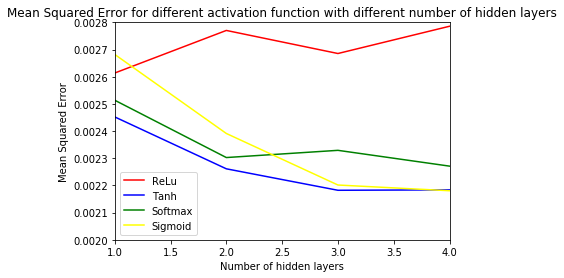

In [3]:
plt.plot(mse_relu, color = 'red', label = 'ReLu')
plt.plot(mse_tanh, color = 'blue', label = 'Tanh')
plt.plot(mse_softmax, color = 'green', label = 'Softmax')
plt.plot(mse_sigmoid, color = 'yellow', label = 'Sigmoid')
plt.title('Mean Squared Error for different activation function with different number of hidden layers')
plt.xlim([1, 4])
plt.ylim([0.002, 0.0028])
plt.xlabel('Number of hidden layers')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

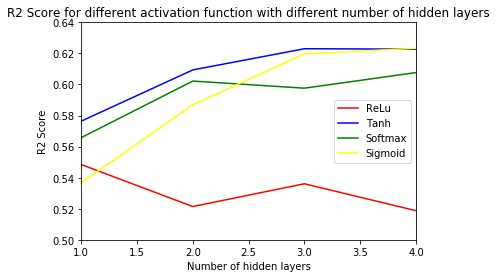

In [4]:
plt.plot(r2_relu, color = 'red', label = 'ReLu')
plt.plot(r2_tanh, color = 'blue', label = 'Tanh')
plt.plot(r2_softmax, color = 'green', label = 'Softmax')
plt.plot(r2_sigmoid, color = 'yellow', label = 'Sigmoid')
plt.title('R2 Score for different activation function with different number of hidden layers')
plt.xlim([1, 4])
plt.ylim([0.5, 0.64])
plt.xlabel('Number of hidden layers')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

### 